<H1> CLUSTERING AND ANALYSIS OF RESULTS OF LENDING CLUB DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
import skfuzzy as fuzz

#Set display options to avoid truncation
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats to 2 decimals


In [2]:
# Importing the zipped data file, extracting it, and creating a dataframe.
df = pd.read_csv("lc_14to16.csv.zip", compression='zip')
display(df.head(10))

C:\Users\charl\AppData\Local\Temp\ipykernel_24864\2972992038.py:2: DtypeWarning: Columns (19,59,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("lc_14to16.csv.zip", compression='zip')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.00,Aug-2003,675.00,679.00,1.00,30.00,NaN,7.00,0.00,2765.00,29.70,13.00,w,0.00,0.00,4421.72,4421.72,3600.00,821.72,0.00,0.00,0.00,Jan-2019,122.67,NaN,Mar-2019,564.00,560.00,0.00,30.00,1.00,Individual,NaN,NaN,NaN,0.00,722.00,144904.00,2.00,2.00,0.00,1.00,21.00,4981.00,36.00,3.00,3.00,722.00,34.00,9300.00,3.00,1.00,4.00,4.00,20701.00,1506.00,37.20,0.00,0.00,148.00,128.00,3.00,3.00,1.00,4.00,69.00,4.00,69.00,2.00,2.00,4.00,2.00,5.00,3.00,4.00,9.00,4.00,7.00,0.00,0.00,0.00,3.00,76.90,0.00,0.00,0.00,178050.00,7746.00,2400.00,13734.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.00,Dec-1999,715.00,719.00,4.00,6.00,NaN,22.00,0.00,21470.00,19.20,38.00,w,0.00,0.00,25679.66,25679.66,24700.00,979.66,0.00,0.00,0.00,Jun-2016,926.35,NaN,Mar-2019,699.00,695.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,0.00,204396.00,1.00,1.00,0.00,1.00,19.00,18005.00,73.00,2.00,3.00,6472.00,29.00,111800.00,0.00,0.00,6.00,4.00,9733.00,57830.00,27.10,0.00,0.00,113.00,192.00,2.00,2.00,4.00,2.00,NaN,0.00,6.00,0.00,5

In [3]:
df_exp = df.copy()

In [4]:
# Convert the issue_d column to datetime format
df_exp['issue_d'] = pd.to_datetime(df_exp['issue_d'])

# Separate the DataFrame into two based on the issue_d column
df_before_2015 = df_exp[df_exp['issue_d'] < '2015-06-01']

In [5]:
#removing unrelated data
df_before_2015 = df_before_2015.drop(columns=['member_id', 'addr_state', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'desc', 'earliest_cr_line', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_status', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'next_pymnt_d', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m', 'out_prncp', 'out_prncp_inv', 'policy_code', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'tax_liens', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'url', 'verification_status', 'zip_code', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'hardship_flag', 'verification_status_joint', 'fico_range_low', 'fico_range_high', 'last_fico_range_high', 'last_fico_range_low', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'il_util', 'inq_last_12m', 'mo_sin_old_il_acct', 'mths_since_recent_inq', 'num_sats', 'num_rev_tl_bal_gt_0', ])

### Data Preprocessing
---

In [6]:
print(df_before_2015.info)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Encoding Grades and others
---

In [7]:
null_counts = df_before_2015['grade'].isnull().sum()
print(null_counts)

0


In [8]:
# Combining employment lenghts into  3 caegories.
df_before_2015["emp_length"] = df_before_2015["emp_length"].replace(['< 1 year', '1 year'], '0-1 years')
df_before_2015["emp_length"] = df_before_2015["emp_length"].replace(['2 years', '3 years', '4 years', '5 years'], '2-5 years')
df_before_2015["emp_length"] = df_before_2015["emp_length"].replace([ '6 years', '7 years', '8 years', '9 years', '10+ years'], '5+ years')

# Combining credit grades into a High-Medium-Low and High-Low for further tasks. 
df_before_2015['ternary_grade'] = df_before_2015['grade'].replace(['A', 'B'], '3.High').replace(['C'], '2.Medium').replace(['D', 'E', 'F', 'G'], '1.Low')

# Dropping rows where home ownership is ANY. 
df_before_2015 = df_before_2015[df.home_ownership != 'ANY']

label_encoder = LabelEncoder()


#Ensure 'ternary_grade' is of string type
df_before_2015['ternary_grade'] = df_before_2015['ternary_grade'].astype(str)

#Define and apply OrdinalEncoder
grade_encoder = OrdinalEncoder(categories=[['1.Low', '2.Medium', '3.High']])
df_before_2015['grade'] = grade_encoder.fit_transform(df_before_2015[['ternary_grade']])

# Label Encoding for 'emp_length' and 'home_ownership'
df_before_2015['emp_length'] = label_encoder.fit_transform(df_before_2015['emp_length'])
df_before_2015['home_ownership'] = label_encoder.fit_transform(df_before_2015['home_ownership'])

C:\Users\charl\AppData\Local\Temp\ipykernel_24864\1178135249.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_before_2015 = df_before_2015[df.home_ownership != 'ANY']


avg_cur_bal                            6
percent_bc_gt_75                    4091
mths_since_last_delinq            189181
mths_since_recent_revol_delinq    247656
mths_since_recent_bc_dlq          285187
max_bal_bc                        387245
all_util                          387245
inq_fi                            387245
dtype: int64


<Axes: >

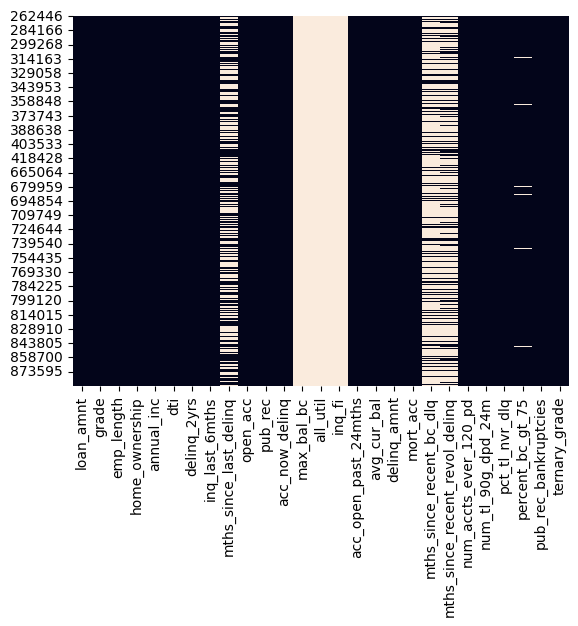

In [9]:
# Create a Missing value report and visualize it for the features using seaborn 
missing = df_before_2015.isnull().sum()
missingcols = missing[missing > 0]
missingcols.sort_values(inplace=True)

print(missingcols)

# Plot 1
missingcols.plot.bar()

# Plot 2
# add a visual of the dataset where the missing values are
sns.heatmap(df_before_2015.isnull(), cbar=False)

In [10]:
#Calculate the percentage of null values for each column
null_percentage = df_before_2015.isnull().mean()

#Filter columns with less than 15% null values
columns_to_keep = null_percentage[null_percentage < 0.15].index

#Create a new DataFrame with the selected columns
filtered_df = df_before_2015[columns_to_keep]

#Display the new DataFrame
print(filtered_df)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



avg_cur_bal            6
percent_bc_gt_75    4091
dtype: int64


<Axes: >

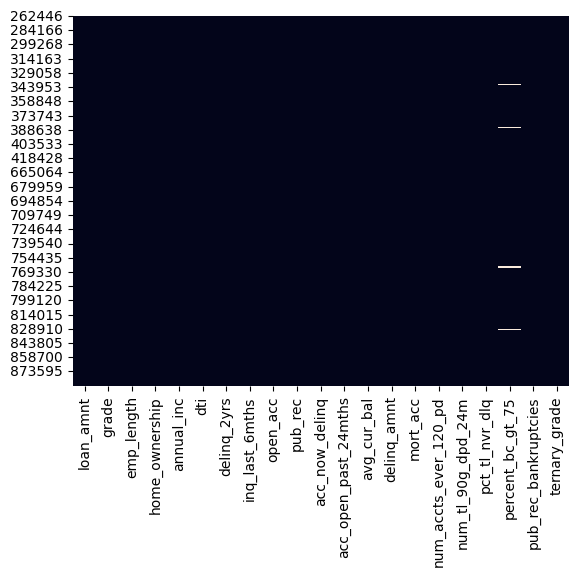

In [11]:
# Create a Missing value report and visualize it for the features using seaborn 
missing = filtered_df.isnull().sum()
missingcols = missing[missing > 0]
missingcols.sort_values(inplace=True)

print(missingcols)

# Plot 1
missingcols.plot.bar()

# Plot 2
# add a visual of the dataset where the missing values are
sns.heatmap(filtered_df.isnull(), cbar=False)

#### Standarization
---


In [12]:
#filter categorical features
filtered_df = filtered_df.select_dtypes(include=['number'])
print(filtered_df.info())

#Exclude the column from scaling
exclude_column = "grade"
columns_to_scale = filtered_df.drop(columns=[exclude_column])

scaler = StandardScaler()
#Apply StandardScaler to the data 
filtered_np_std = scaler.fit_transform(columns_to_scale)


<class 'pandas.core.frame.DataFrame'>
Index: 387245 entries, 262446 to 888464
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              387245 non-null  float64
 1   grade                  387245 non-null  float64
 2   emp_length             387245 non-null  int32  
 3   home_ownership         387245 non-null  int32  
 4   annual_inc             387245 non-null  float64
 5   dti                    387245 non-null  float64
 6   delinq_2yrs            387245 non-null  float64
 7   inq_last_6mths         387245 non-null  float64
 8   open_acc               387245 non-null  float64
 9   pub_rec                387245 non-null  float64
 10  acc_now_delinq         387245 non-null  float64
 11  acc_open_past_24mths   387245 non-null  float64
 12  avg_cur_bal            387239 non-null  float64
 13  delinq_amnt            387245 non-null  float64
 14  mort_acc               387245 non-nu

In [13]:
#Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(filtered_np_std, columns=columns_to_scale.columns, index=filtered_df.index)

print(scaled_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 387245 entries, 262446 to 888464
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              387245 non-null  float64
 1   emp_length             387245 non-null  float64
 2   home_ownership         387245 non-null  float64
 3   annual_inc             387245 non-null  float64
 4   dti                    387245 non-null  float64
 5   delinq_2yrs            387245 non-null  float64
 6   inq_last_6mths         387245 non-null  float64
 7   open_acc               387245 non-null  float64
 8   pub_rec                387245 non-null  float64
 9   acc_now_delinq         387245 non-null  float64
 10  acc_open_past_24mths   387245 non-null  float64
 11  avg_cur_bal            387239 non-null  float64
 12  delinq_amnt            387245 non-null  float64
 13  mort_acc               387245 non-null  float64
 14  num_accts_ever_120_pd  387245 non-nu

In [14]:
#convert df into np
filtered_df_std_1 =pd.DataFrame(scaled_df, columns = columns_to_scale.columns)

#Combine the scaled data with the excluded column
filtered_df_std = pd.concat([filtered_df_std_1, filtered_df[exclude_column]], axis=1)

 
print(filtered_df_std.info())

<class 'pandas.core.frame.DataFrame'>
Index: 387245 entries, 262446 to 888464
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              387245 non-null  float64
 1   emp_length             387245 non-null  float64
 2   home_ownership         387245 non-null  float64
 3   annual_inc             387245 non-null  float64
 4   dti                    387245 non-null  float64
 5   delinq_2yrs            387245 non-null  float64
 6   inq_last_6mths         387245 non-null  float64
 7   open_acc               387245 non-null  float64
 8   pub_rec                387245 non-null  float64
 9   acc_now_delinq         387245 non-null  float64
 10  acc_open_past_24mths   387245 non-null  float64
 11  avg_cur_bal            387239 non-null  float64
 12  delinq_amnt            387245 non-null  float64
 13  mort_acc               387245 non-null  float64
 14  num_accts_ever_120_pd  387245 non-nu

#### Outlier detection and Imputation
---


In [15]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the strategy to use the median
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the data and transform it
imputed_data = imputer.fit_transform(filtered_df_std)

# Convert the imputed data back to a DataFrame
filtered_df_std_imputed = pd.DataFrame(imputed_data, columns=filtered_df_std.columns)

In [16]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope


#Initialize Models
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
iso_forest = IsolationForest(contamination=0.03, random_state=42)
elliptic_env = EllipticEnvelope(contamination=0.03, random_state=42)

#Fit and Predict Outliers
#LOF returns -1 for outliers, using fit_predict
lof_pred = lof.fit_predict(filtered_df_std_imputed)

#Isolation Forest
iso_forest.fit(filtered_df_std_imputed)
iso_pred = iso_forest.predict(filtered_df_std_imputed)

#Elliptic Envelope
elliptic_env.fit(filtered_df_std_imputed)
elliptic_pred = elliptic_env.predict(filtered_df_std_imputed)

#Aggregate Results
#Combine predictions: -1 is an outlier, 1 is an inlier
predictions = np.vstack((lof_pred, iso_pred, elliptic_pred)).T

#Sum votes for each row
outlier_votes = np.sum(predictions == -1, axis=1)

#Identify rows with at least 2 votes for being an outlier
rows_to_remove = outlier_votes >= 2

#Check Percentage of Outliers
outlier_percentage = np.sum(rows_to_remove) / len(filtered_df_std_imputed) * 100
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

#Remove outliers if they are less than 3% of the data
if outlier_percentage < 3:
    cleaned_filtered_df_std_imputed = filtered_df_std_imputed[~rows_to_remove]
    print(f"Number of rows removed: {np.sum(rows_to_remove)}")
else:
    print("Outliers exceed 3% of the data. No rows removed.")
print()

G:\allconda\moreconda\envs\tf\lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-292.328284490688702 > -362.248195743484871). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
G:\allconda\moreconda\envs\tf\lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-399.934434164991046 > -465.325300851448446). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
G:\allconda\moreconda\envs\tf\lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-140.108780496207828 > -467.026377898188343). You may want to try with a higher value of support_fraction (current value: 0.503).
  w

Percentage of outliers: 1.79%
Number of rows removed: 6944



In [17]:
#check distribution of grade
distribution = cleaned_filtered_df_std_imputed['grade'].value_counts()
print(distribution)

grade
2.00    162590
0.00    109922
1.00    107789
Name: count, dtype: int64


### dimension reduction
---

In [18]:
from sklearn.decomposition import PCA
import umap.umap_ as umap
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

#### PCA
---

In [19]:
#Apply PCA to the data
pca = PCA()
pcs = pca.fit_transform(cleaned_filtered_df_std_imputed)

#Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

#Create a DataFrame to describe the variance
variance_df = pd.DataFrame(data={
    'Principal Component': [f'PC{i+1}' for i in range(cleaned_filtered_df_std_imputed.shape[1])],
    'Explained Variance': explained_variance_ratio,
    'Cumulative Variance': explained_variance_ratio.cumsum()
})

print(variance_df)

#Find the number of components required to explain at least 85% of variance
n_components_to_keep = sum(pca.explained_variance_ratio_.cumsum() < 0.85) + 1
print(f"Number of components to retain 85% variance: {n_components_to_keep}")

#Apply PCA again with the selected number of components
pca_reduced = PCA(n_components=n_components_to_keep)
pcs_reduced = pca_reduced.fit_transform(cleaned_filtered_df_std_imputed)

#Create a DataFrame for the reduced dataset
pca_df = pd.DataFrame(data=pcs_reduced, columns=[f'PC{i+1}' for i in range(n_components_to_keep)])

print("Reduced dataset shape:", pca_df.shape)

   Principal Component  Explained Variance  Cumulative Variance
0                  PC1                0.14                 0.14
1                  PC2                0.11                 0.25
2                  PC3                0.10                 0.35
3                  PC4                0.09                 0.44
4                  PC5                0.08                 0.51
5                  PC6                0.06                 0.57
6                  PC7                0.06                 0.63
7                  PC8                0.05                 0.68
8                  PC9                0.04                 0.73
9                 PC10                0.04                 0.77
10                PC11                0.04                 0.81
11                PC12                0.03                 0.84
12                PC13                0.03                 0.87
13                PC14                0.03                 0.90
14                PC15                0.


Correlation Matrix of Principal Components:
       PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12  \
PC1   1.00 -0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00   
PC2  -0.00  1.00 -0.00 -0.00  0.00  0.00  0.00  0.00  0.00 -0.00 -0.00  0.00   
PC3   0.00 -0.00  1.00  0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00   
PC4   0.00 -0.00  0.00  1.00  0.00 -0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00   
PC5  -0.00  0.00  0.00  0.00  1.00  0.00  0.00 -0.00  0.00 -0.00 -0.00  0.00   
PC6   0.00  0.00  0.00 -0.00  0.00  1.00  0.00 -0.00  0.00  0.00 -0.00  0.00   
PC7  -0.00  0.00 -0.00 -0.00  0.00  0.00  1.00 -0.00 -0.00 -0.00 -0.00  0.00   
PC8  -0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00  1.00 -0.00 -0.00 -0.00  0.00   
PC9   0.00  0.00  0.00  0.00  0.00  0.00 -0.00 -0.00  1.00 -0.00 -0.00 -0.00   
PC10  0.00 -0.00 -0.00  0.00 -0.00  0.00 -0.00 -0.00 -0.00  1.00 -0.00  0.00   
PC11  0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00  1.00 -0.0

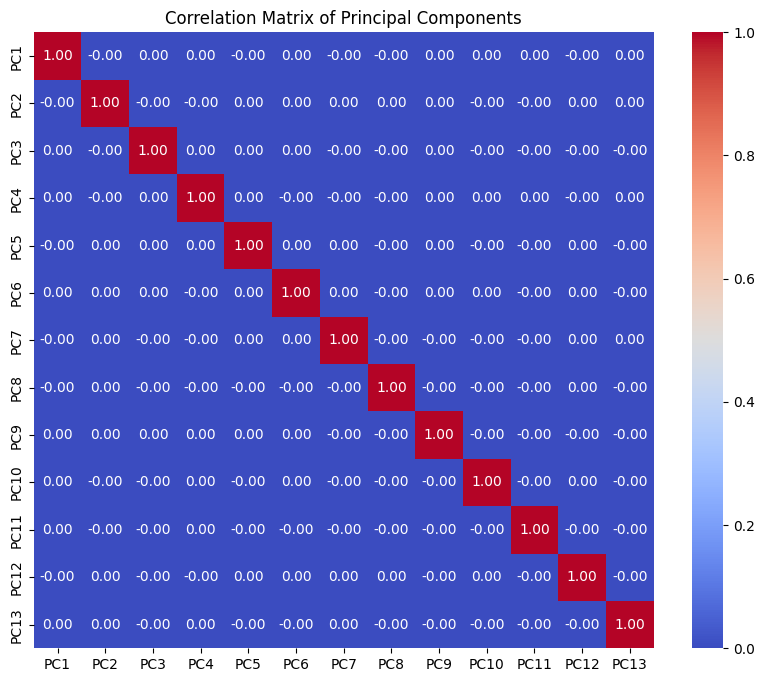

In [20]:
correlation_matrix = pca_df.corr()

#Display the correlation matrix
print("\nCorrelation Matrix of Principal Components:")
print(correlation_matrix)

#Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Principal Components')
plt.show()

#### UMAP
---

In [21]:
#Reduce to 2 dimensions
umap_2d = umap.UMAP(n_components=2, random_state=42)
reduced_2d = umap_2d.fit_transform(cleaned_filtered_df_std_imputed)

#Reduce to 3 dimensions
umap_3d = umap.UMAP(n_components=3, random_state=42)
reduced_3d = umap_3d.fit_transform(cleaned_filtered_df_std_imputed)

#Create DataFrames for visualization
umap_df_2d = pd.DataFrame(reduced_2d, columns=['UMAP1', 'UMAP2'])
umap_df_3d = pd.DataFrame(reduced_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])

G:\allconda\moreconda\envs\tf\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
G:\allconda\moreconda\envs\tf\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Correlation Matrix for UMAP 2D:
       UMAP1  UMAP2
UMAP1   1.00  -0.46
UMAP2  -0.46   1.00


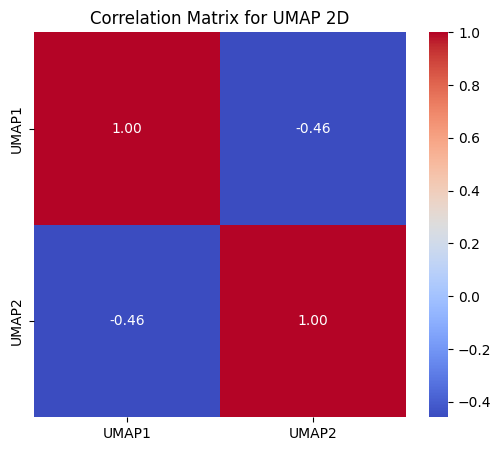

Correlation Matrix for UMAP 3D:
       UMAP1  UMAP2  UMAP3
UMAP1   1.00  -0.50   0.08
UMAP2  -0.50   1.00  -0.33
UMAP3   0.08  -0.33   1.00


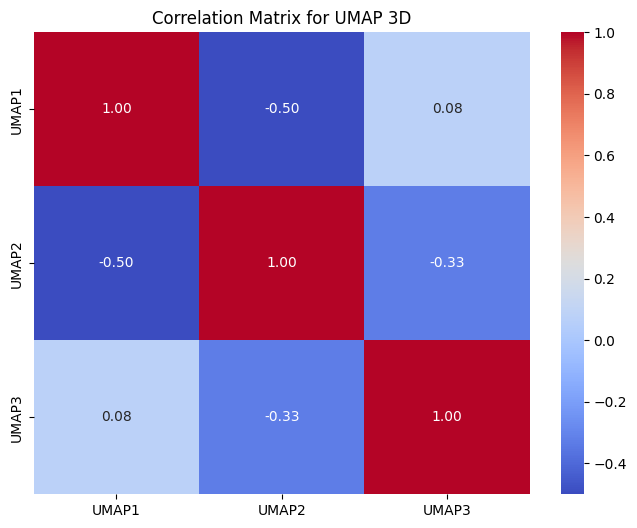

In [22]:
#Correlation for UMAP 2D
correlation_2d = umap_df_2d[['UMAP1', 'UMAP2']].corr()
print("Correlation Matrix for UMAP 2D:")
print(correlation_2d)

#Visualize Correlation for UMAP 2D
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_2d, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for UMAP 2D')
plt.show()

#Correlation for UMAP 3D
correlation_3d = umap_df_3d[['UMAP1', 'UMAP2', 'UMAP3']].corr()
print("Correlation Matrix for UMAP 3D:")
print(correlation_3d)

#Visualize Correlation for UMAP 3D
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_3d, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for UMAP 3D')
plt.show()

## Clustering
---

### K-mean 2D with Umap

In [23]:
#km_2d = reduced_2d_df.copy().drop(columns='track_genre_top')
km_2d = umap_df_2d
#km_3d = reduced_3d_df.copy().drop(columns='track_genre_top')
km_3d = umap_df_3d

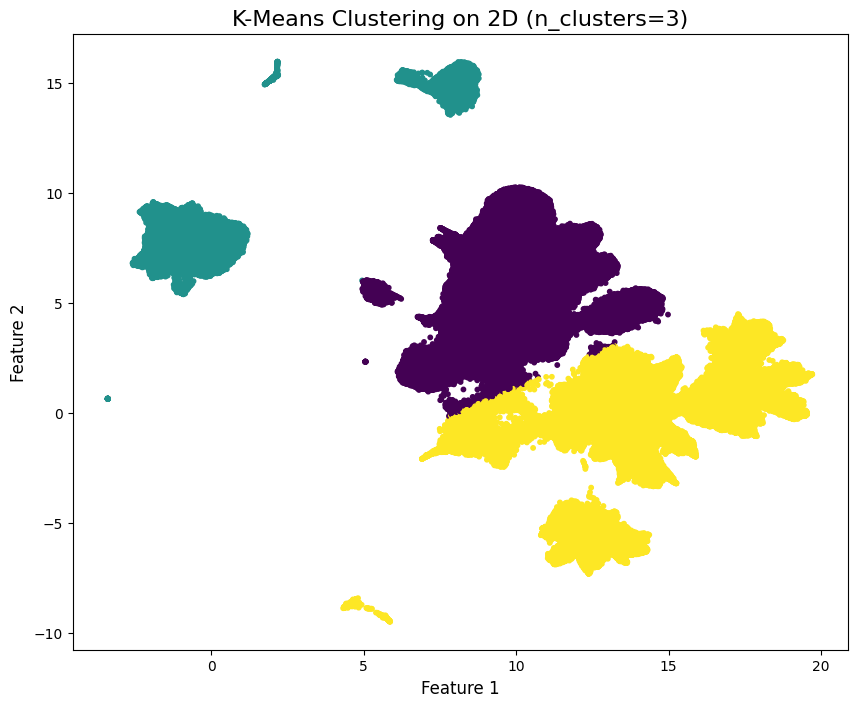

In [24]:
# Iterate over different values of n_clusters
#for n_clusters in range(2, 5):  # Includes 5, 6, 7, 8
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
km_2d['kmeans_labels'] = kmeans.fit_predict(km_2d)
    
# Create a larger plot
plt.figure(figsize=(10, 8))  # Adjust width and height as needed
plt.scatter(km_2d.iloc[:, 0], km_2d.iloc[:, 1], c=km_2d['kmeans_labels'], cmap='viridis', s=10)
plt.title(f"K-Means Clustering on 2D (n_clusters={3})", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()

In [25]:
cleaned_filtered_df_std_imputed['Cluster_km2d'] = km_2d['kmeans_labels'] 

#group by clusters and analyze
grouped = cleaned_filtered_df_std_imputed.groupby('Cluster_km2d')['grade'].value_counts(normalize=True)
print(grouped)

Cluster_km2d  grade
0.00          2.00    0.43
              0.00    0.29
              1.00    0.28
1.00          2.00    0.43
              0.00    0.29
              1.00    0.28
2.00          2.00    0.43
              0.00    0.29
              1.00    0.28
Name: proportion, dtype: float64


C:\Users\charl\AppData\Local\Temp\ipykernel_24864\3326286125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_filtered_df_std_imputed['Cluster_km2d'] = km_2d['kmeans_labels']


### Analysis on clustering grouping vs grade grouping
---

Uniformly distributed along each cluster, thus no correlation is observed

In [26]:
cluster_stats_km2d = cleaned_filtered_df_std_imputed.groupby('Cluster_km2d').describe()
print(cluster_stats_km2d)

             loan_amnt                                        emp_length  \
                 count  mean  std   min   25%   50%  75%  max      count   
Cluster_km2d                                                               
0.00         160774.00 -0.00 1.00 -1.66 -0.77 -0.18 0.59 2.36  160774.00   
1.00          60488.00 -0.01 0.99 -1.66 -0.77 -0.20 0.59 2.36   60488.00   
2.00         152206.00 -0.00 1.00 -1.66 -0.77 -0.18 0.59 2.36  152206.00   

                                                   home_ownership            \
              mean  std   min   25%  50%  75%  max          count mean  std   
Cluster_km2d                                                                  
0.00         -0.00 1.00 -1.87 -0.61 0.64 0.64 1.90      160774.00 0.00 1.00   
1.00          0.00 0.99 -1.87 -0.61 0.64 0.64 1.90       60488.00 0.00 1.00   
2.00          0.00 1.00 -1.87 -0.61 0.64 0.64 1.90      152206.00 0.00 1.00   

                                         annual_inc                 

In [27]:
null_counts = cleaned_filtered_df_std_imputed['Cluster_km2d'].isnull().sum()
print(null_counts)

6833


In [28]:
#Dropping rows with null values in column cluster
km2d_Y = cleaned_filtered_df_std_imputed.dropna(subset=['Cluster_km2d']).copy()
km2d_Y = km2d_Y.drop(columns=[])

In [29]:
from sklearn.ensemble import RandomForestClassifier

#Train random forest to predict cluster labels
clf = RandomForestClassifier(random_state=42)
clf.fit(km2d_Y.drop(columns=['Cluster_km2d']), km2d_Y['Cluster_km2d'])



RandomForestClassifier(random_state=42)

In [30]:
#Get feature importance
feature_importance = pd.DataFrame({
    'Feature': km2d_Y.drop(columns=['Cluster_km2d']).columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                  Feature  Importance
11            avg_cur_bal        0.13
4                     dti        0.13
3              annual_inc        0.12
0               loan_amnt        0.10
7                open_acc        0.08
10   acc_open_past_24mths        0.07
17       percent_bc_gt_75        0.07
16         pct_tl_nvr_dlq        0.07
13               mort_acc        0.05
1              emp_length        0.03
6          inq_last_6mths        0.03
19                  grade        0.03
2          home_ownership        0.02
14  num_accts_ever_120_pd        0.02
5             delinq_2yrs        0.02
8                 pub_rec        0.01
18   pub_rec_bankruptcies        0.01
15     num_tl_90g_dpd_24m        0.01
9          acc_now_delinq        0.00
12            delinq_amnt        0.00


### Analysis on clustering grouping by feature importance
---

C:\Users\charl\AppData\Local\Temp\ipykernel_24864\393937625.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_km2d', y=feature, data=km2d_Y, palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipykernel_24864\393937625.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_km2d', y=feature, data=km2d_Y, palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipykernel_24864\393937625.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_km2d', y=feature, data=km2d_Y, palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipy

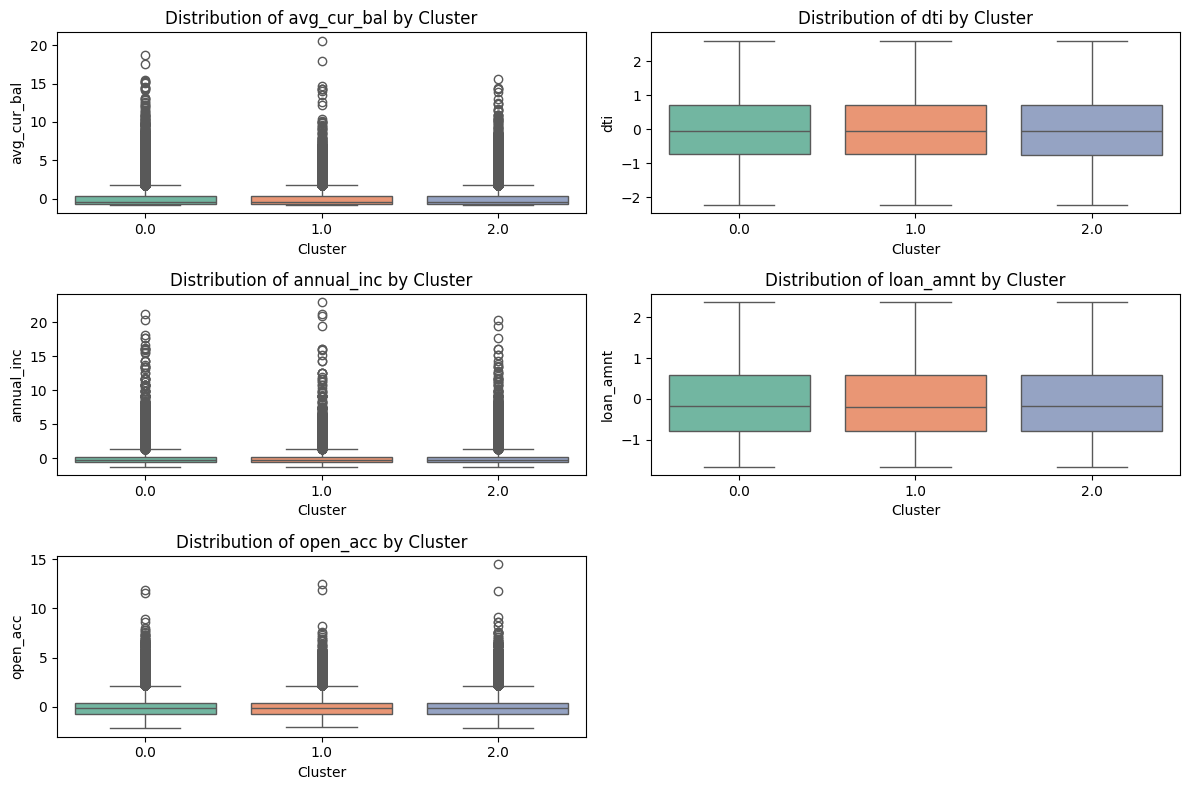

In [31]:
#Select the top 5 features
top_features = ['avg_cur_bal', 'dti', 'annual_inc', 'loan_amnt', 'open_acc']

#Create box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Cluster_km2d', y=feature, data=km2d_Y, palette='Set2')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [ ]:
#Select top 5 features and cluster column
#Group by cluster and calculate statistics
summary_stats = km2d_Y.groupby('Cluster_km2d')[top_features].describe()

#Display the summary
print(summary_stats)

In [33]:
cleaned_filtered_df_std_imputed_KM_2d_Nova = km2d_Y.dropna(subset =['Cluster_km2d'])

In [34]:
from scipy.stats import f_oneway

#Perform ANOVA for each selected column
anova_results = {}
for col in top_features:
    groups = [cleaned_filtered_df_std_imputed_KM_2d_Nova[cleaned_filtered_df_std_imputed_KM_2d_Nova['Cluster_km2d'] == cluster][col] for cluster in cleaned_filtered_df_std_imputed_KM_2d_Nova['Cluster_km2d'].unique()]
    anova_results[col] = f_oneway(*groups)

#Display p-values for each feature
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")

avg_cur_bal: F-statistic = 1.02, p-value = 0.3592
dti: F-statistic = 2.41, p-value = 0.0902
annual_inc: F-statistic = 0.95, p-value = 0.3885
loan_amnt: F-statistic = 1.39, p-value = 0.2493
open_acc: F-statistic = 0.71, p-value = 0.4893


#### Local conclusion:
---

##### avg_cur_bal (F-statistic = 1.02, p-value = 0.3592):

The p-value of 0.3592 suggests that the differences in the average current balance across the UMAP 2D clusters are not statistically significant. This implies that this feature does not contribute meaningfully to distinguishing between the clusters.
dti (F-statistic = 2.41, p-value = 0.0902):

##### dti (F-statistic = 2.41, p-value = 0.0902):

With a p-value of 0.0902, the debt-to-income ratio shows marginal evidence of variation across the clusters. While not below the conventional 0.05 threshold, this feature might still have a weak association with cluster differences and could be worth further investigation.


##### annual_inc (F-statistic = 0.95, p-value = 0.3885):

In [ ]:
The p-value of 0.3885 indicates no significant variation in annual income across the clusters. This suggests that annual income is not a defining characteristic of these clusters.

##### loan_amnt (F-statistic = 1.39, p-value = 0.2493):

The p-value of 0.2493 suggests no significant differences in loan amounts among the clusters. This feature does not appear to play a substantial role in distinguishing between cluster groups.

##### lopen_acc (F-statistic = 0.71, p-value = 0.4893):

With a p-value of 0.4893, the number of open credit accounts does not show significant variation across the clusters, indicating it is not a key feature driving the cluster formation.

### K-mean 3D with Umap

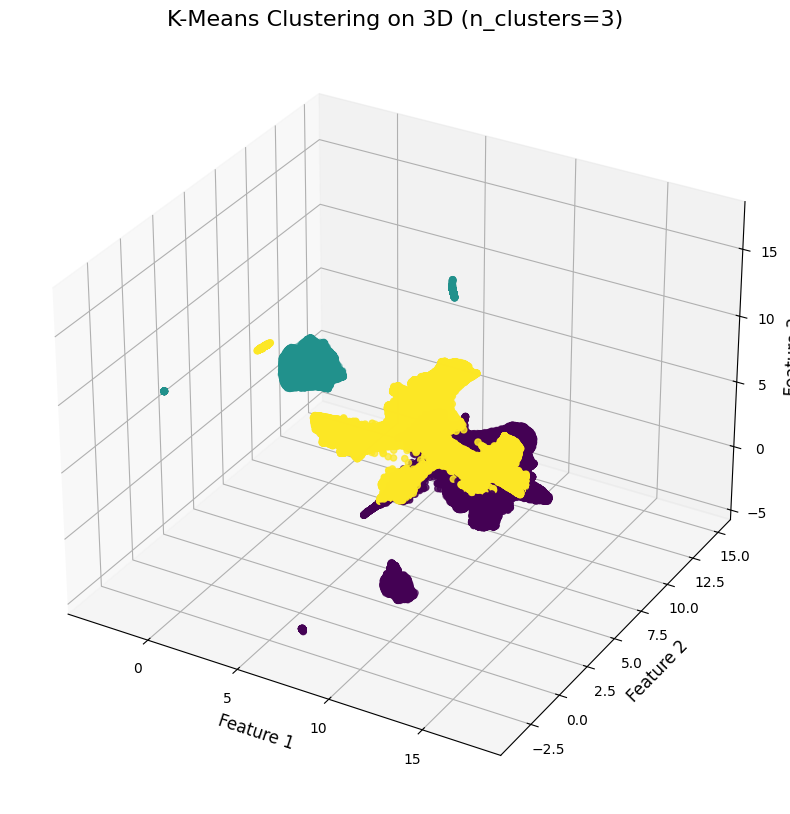

In [35]:
    # Apply K-Means
    kmeans = KMeans(n_clusters=3, random_state=42)
    km_3d['kmeans_labels'] = kmeans.fit_predict(km_3d)
    
    # Create a larger 3D plot
    fig = plt.figure(figsize=(12, 10))  # Adjust width and height as needed
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        km_3d.iloc[:, 0],  # First dimension
        km_3d.iloc[:, 1],  # Second dimension
        km_3d.iloc[:, 2],  # Third dimension
        c=km_3d['kmeans_labels'], 
        cmap='viridis', 
        s=20
    )
    
    # Add plot details
    ax.set_title(f"K-Means Clustering on 3D (n_clusters={3})", fontsize=16)
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)
    ax.set_zlabel("Feature 3", fontsize=12)
    
    # Show the plot
    plt.show()

In [36]:
cleaned_filtered_df_std_imputed['Cluster_km3d'] = km_3d['kmeans_labels'] 

#group by clusters and analyze
grouped = cleaned_filtered_df_std_imputed.groupby('Cluster_km3d')['grade'].value_counts(normalize=True)
print(grouped)

Cluster_km3d  grade
0.00          2.00    0.43
              0.00    0.29
              1.00    0.28
1.00          2.00    0.42
              0.00    0.29
              1.00    0.28
2.00          2.00    0.43
              0.00    0.29
              1.00    0.28
Name: proportion, dtype: float64


C:\Users\charl\AppData\Local\Temp\ipykernel_24864\1334043597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_filtered_df_std_imputed['Cluster_km3d'] = km_3d['kmeans_labels']


### Analysis on clustering grouping vs grade grouping
---

Similar to the previous attempt, no sign of correlation is observed

In [37]:
#Dropping rows with null values in column cluster
km3d_Y = cleaned_filtered_df_std_imputed.dropna(subset=['Cluster_km3d']).copy()
km3d_Y = km3d_Y.drop(columns=[])

In [38]:
#Train random forest to predict cluster labels
clf = RandomForestClassifier(random_state=42)
clf.fit(km3d_Y.drop(columns=['Cluster_km3d', 'Cluster_km2d']), km3d_Y['Cluster_km3d'])



RandomForestClassifier(random_state=42)

In [39]:
#Get feature importance
feature_importance = pd.DataFrame({
    'Feature': km3d_Y.drop(columns=['Cluster_km3d','Cluster_km2d']).columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                  Feature  Importance
11            avg_cur_bal        0.14
4                     dti        0.13
3              annual_inc        0.12
0               loan_amnt        0.11
7                open_acc        0.08
10   acc_open_past_24mths        0.07
16         pct_tl_nvr_dlq        0.07
17       percent_bc_gt_75        0.06
13               mort_acc        0.05
1              emp_length        0.03
19                  grade        0.03
6          inq_last_6mths        0.03
2          home_ownership        0.02
14  num_accts_ever_120_pd        0.02
5             delinq_2yrs        0.02
8                 pub_rec        0.01
18   pub_rec_bankruptcies        0.01
15     num_tl_90g_dpd_24m        0.01
9          acc_now_delinq        0.00
12            delinq_amnt        0.00


### Analysis on clustering grouping by feature importance
---

C:\Users\charl\AppData\Local\Temp\ipykernel_24864\224156129.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_km3d', y=feature, data=km3d_Y, palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipykernel_24864\224156129.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_km3d', y=feature, data=km3d_Y, palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipykernel_24864\224156129.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_km3d', y=feature, data=km3d_Y, palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipy

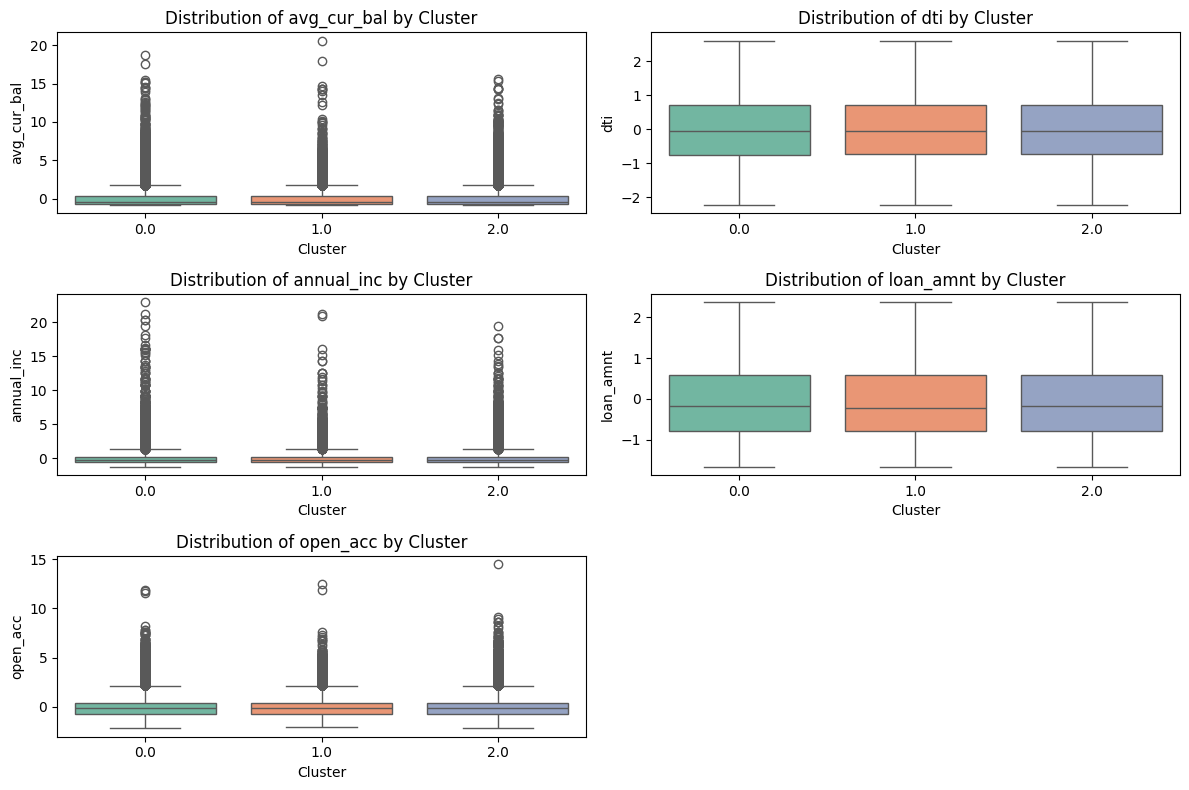

In [40]:
#Select the top 5 features
top_features = ['avg_cur_bal', 'dti', 'annual_inc', 'loan_amnt', 'open_acc']

#Create box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Cluster_km3d', y=feature, data=km3d_Y, palette='Set2')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [41]:
#Select top 5 features and cluster column
#Group by cluster and calculate statistics
summary_stats = km3d_Y.groupby('Cluster_km3d')[top_features].describe()

#Display the summary
print(summary_stats)

             avg_cur_bal                                               dti  \
                   count  mean  std   min   25%   50%  75%   max     count   
Cluster_km3d                                                                 
0.00           173849.00 -0.02 0.95 -0.84 -0.64 -0.38 0.31 18.67 173849.00   
1.00            44342.00 -0.01 0.96 -0.84 -0.64 -0.37 0.32 20.61  44342.00   
2.00           155277.00 -0.01 0.95 -0.84 -0.64 -0.38 0.31 15.54 155277.00   

                                                   annual_inc             \
             mean  std   min   25%   50%  75%  max      count  mean  std   
Cluster_km3d                                                               
0.00         0.01 1.00 -2.23 -0.74 -0.05 0.71 2.61  173849.00 -0.02 0.81   
1.00         0.00 1.00 -2.23 -0.74 -0.05 0.71 2.60   44342.00 -0.02 0.81   
2.00         0.01 1.00 -2.23 -0.74 -0.05 0.72 2.61  155277.00 -0.02 0.79   

                                          loan_amnt                       

In [42]:
cleaned_filtered_df_std_imputed_KM_3d_Nova = km3d_Y.dropna(subset =['Cluster_km3d'])

In [43]:
from scipy.stats import f_oneway

#Perform ANOVA for each selected column
anova_results = {}
for col in top_features:
    groups = [cleaned_filtered_df_std_imputed_KM_3d_Nova[cleaned_filtered_df_std_imputed_KM_3d_Nova['Cluster_km3d'] == cluster][col] for cluster in cleaned_filtered_df_std_imputed_KM_3d_Nova['Cluster_km3d'].unique()]
    anova_results[col] = f_oneway(*groups)

#Display p-values for each feature
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")

avg_cur_bal: F-statistic = 1.03, p-value = 0.3575
dti: F-statistic = 1.72, p-value = 0.1785
annual_inc: F-statistic = 0.15, p-value = 0.8615
loan_amnt: F-statistic = 1.91, p-value = 0.1480
open_acc: F-statistic = 0.34, p-value = 0.7113


#### local conclusion

##### avg_cur_bal (F-statistic = 1.03, p-value = 0.3575):

The p-value of 0.3575 indicates that the average current balance does not vary significantly across the UMAP 3D clusters. This suggests that this feature is not a major determinant of the cluster groupings.

##### dti (F-statistic = 1.72, p-value = 0.1785):

With a p-value of 0.1785, the debt-to-income ratio shows some level of variation, though it is not statistically significant. This feature may have some influence on the clusters but not to a meaningful extent at the standard significance threshold (
𝑝
<
0.05
p<0.05).

##### annual_inc (F-statistic = 0.15, p-value = 0.8615):

The extremely high p-value (0.8615) suggests no significant variation in annual income across the clusters. This indicates that annual income is almost uniformly distributed among the clusters, providing little to no differentiation.

##### loan_amnt (F-statistic = 1.91, p-value = 0.1480):

The p-value of 0.1480 shows marginal, but still insignificant, evidence of variation in loan amounts among the clusters. This feature could be worth further exploration but does not strongly differentiate the clusters.

##### open_acc (F-statistic = 0.34, p-value = 0.7113):

The p-value of 0.7113 indicates no significant differences in the number of open accounts across the clusters. This feature is not a meaningful driver of cluster separation.

### K-mean with PCA

In [44]:
km_pca = pca_df

In [45]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
km_pca['kmeans_labels'] = kmeans.fit_predict(km_pca)



In [46]:
cleaned_filtered_df_std_imputed['Cluster_km_pca'] = km_pca['kmeans_labels']

C:\Users\charl\AppData\Local\Temp\ipykernel_24864\3426864653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_filtered_df_std_imputed['Cluster_km_pca'] = km_pca['kmeans_labels']


In [47]:
#check distribution of grade
distribution = cleaned_filtered_df_std_imputed['Cluster_km_pca'].value_counts()
print(distribution)

Cluster_km_pca
2.00    161769
0.00    161747
1.00     49952
Name: count, dtype: int64


In [48]:
#group by clusters and analyze
grouped = cleaned_filtered_df_std_imputed.groupby('Cluster_km_pca')['grade'].value_counts(normalize=True)
print(grouped)

Cluster_km_pca  grade
0.00            2.00    0.43
                0.00    0.29
                1.00    0.28
1.00            2.00    0.42
                0.00    0.29
                1.00    0.28
2.00            2.00    0.43
                0.00    0.29
                1.00    0.28
Name: proportion, dtype: float64


### Analysis on clustering grouping vs grade grouping
---

No correlation observed

In [49]:
#Dropping rows with null values in column cluster
kmPCA_Y = cleaned_filtered_df_std_imputed.dropna(subset=['Cluster_km_pca']).copy()
kmPCA_Y = kmPCA_Y.drop(columns=[])

In [50]:
#Train random forest to predict cluster labels
clf = RandomForestClassifier(random_state=42)
clf.fit(kmPCA_Y.drop(columns=['Cluster_km3d', 'Cluster_km2d','Cluster_km_pca']), kmPCA_Y['Cluster_km_pca'])



RandomForestClassifier(random_state=42)

In [51]:
#Get feature importance
feature_importance = pd.DataFrame({
    'Feature': kmPCA_Y.drop(columns=['Cluster_km3d','Cluster_km2d', 'Cluster_km_pca']).columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                  Feature  Importance
11            avg_cur_bal        0.14
4                     dti        0.13
3              annual_inc        0.12
0               loan_amnt        0.10
7                open_acc        0.08
10   acc_open_past_24mths        0.07
16         pct_tl_nvr_dlq        0.07
17       percent_bc_gt_75        0.07
13               mort_acc        0.05
1              emp_length        0.03
6          inq_last_6mths        0.03
19                  grade        0.03
14  num_accts_ever_120_pd        0.02
2          home_ownership        0.02
5             delinq_2yrs        0.02
8                 pub_rec        0.01
18   pub_rec_bankruptcies        0.01
15     num_tl_90g_dpd_24m        0.01
9          acc_now_delinq        0.00
12            delinq_amnt        0.00


### Analysis on clustering grouping by feature importance
---

C:\Users\charl\AppData\Local\Temp\ipykernel_24864\4024449280.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_km_pca', y=feature, data=kmPCA_Y, palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipykernel_24864\4024449280.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_km_pca', y=feature, data=kmPCA_Y, palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipykernel_24864\4024449280.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_km_pca', y=feature, data=kmPCA_Y, palette='Set2')
C:\Users\charl\AppData\Lo

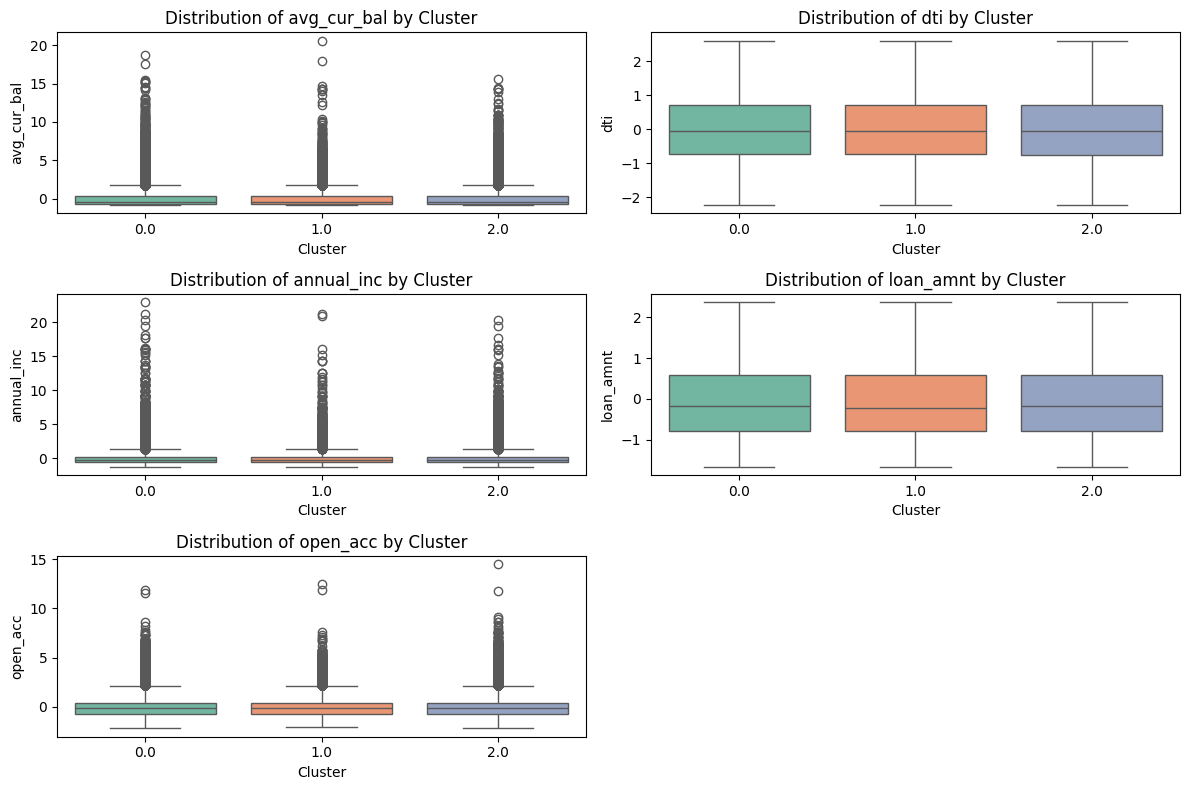

In [52]:
#Select the top 5 features
top_features = ['avg_cur_bal', 'dti', 'annual_inc', 'loan_amnt', 'open_acc']

#Create box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Cluster_km_pca', y=feature, data=kmPCA_Y, palette='Set2')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [53]:
#Select top 5 features and cluster column
#Group by cluster and calculate statistics
summary_stats = kmPCA_Y.groupby('Cluster_km_pca')[top_features].describe()

#Display the summary
print(summary_stats)

               avg_cur_bal                                               dti  \
                     count  mean  std   min   25%   50%  75%   max     count   
Cluster_km_pca                                                                 
0.00             161747.00 -0.01 0.95 -0.84 -0.64 -0.38 0.31 18.67 161747.00   
1.00              49952.00 -0.01 0.95 -0.84 -0.64 -0.37 0.32 20.61  49952.00   
2.00             161769.00 -0.02 0.94 -0.84 -0.64 -0.38 0.31 15.54 161769.00   

                                                     annual_inc             \
               mean  std   min   25%   50%  75%  max      count  mean  std   
Cluster_km_pca                                                               
0.00           0.01 0.99 -2.23 -0.74 -0.05 0.71 2.61  161747.00 -0.02 0.80   
1.00           0.00 0.99 -2.23 -0.74 -0.05 0.71 2.60   49952.00 -0.02 0.81   
2.00           0.01 1.00 -2.23 -0.74 -0.05 0.72 2.61  161769.00 -0.02 0.79   

                                            loan_a

In [54]:
if cleaned_filtered_df_std_imputed.isnull().any().any():
    print("Warning: Dataset contains NaN values. Handle them before ANOVA.")

In [55]:
cleaned_filtered_df_std_imputed_KM_PCA_Nova = kmPCA_Y.dropna(subset =['Cluster_km_pca'])

In [56]:
from scipy.stats import f_oneway

#Perform ANOVA for each selected column
anova_results = {}
for col in top_features:
    groups = [cleaned_filtered_df_std_imputed_KM_PCA_Nova[cleaned_filtered_df_std_imputed_KM_PCA_Nova['Cluster_km_pca'] == cluster][col] for cluster in cleaned_filtered_df_std_imputed_KM_PCA_Nova['Cluster_km_pca'].unique()]
    anova_results[col] = f_oneway(*groups)

#Display p-values for each feature
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")

avg_cur_bal: F-statistic = 0.74, p-value = 0.4761
dti: F-statistic = 1.33, p-value = 0.2636
annual_inc: F-statistic = 0.09, p-value = 0.9144
loan_amnt: F-statistic = 1.25, p-value = 0.2854
open_acc: F-statistic = 2.06, p-value = 0.1276


#### Local Conclusion

##### avg_cur_bal (F-statistic = 0.74, p-value = 0.4761):

With a p-value of 0.4761, there is no significant variation in the average current balance across the UMAP clusters. This feature does not play a critical role in differentiating the clusters.

##### dti (F-statistic = 1.33, p-value = 0.2636):


The p-value of 0.2636 indicates that the debt-to-income ratio shows mild variability, though it is not statistically significant. This suggests that this feature may have limited influence on cluster formation.

##### annual_inc (F-statistic = 0.09, p-value = 0.9144):

The extremely high p-value (0.9144) indicates that annual income is uniformly distributed across the clusters. This feature provides negligible information for distinguishing clusters.

##### loan_amnt (F-statistic = 1.25, p-value = 0.2854):

A p-value of 0.2854 shows some variability in loan amounts across clusters, though it is not significant. Loan amount is likely not a key factor in cluster formation.

##### open_acc (F-statistic = 2.06, p-value = 0.1276):


With a p-value of 0.1276, the number of open accounts shows the most potential variation among the analyzed features. While still not statistically significant, this feature might offer a hint of differentiation among the clusters.

### HDBSCAN


In [57]:
hdbscan_2d = umap_df_2d
hdbscan_3d = umap_df_3d

In [58]:
#for min_cluster in range(2, 5):
hdb = hdbscan.HDBSCAN(approx_min_span_tree=True, min_cluster_size=1000, metric='euclidean', min_samples=1500, cluster_selection_method= 'eom')
hdbscan_2d['hdbscan_labels'] = hdb.fit_predict(hdbscan_2d)
        



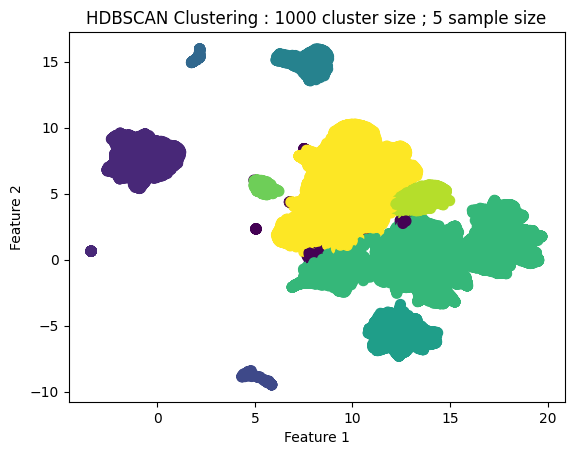

In [59]:
        # Visualize HDBSCAN Clustering
        plt.scatter(hdbscan_2d.iloc[:, 0], hdbscan_2d.iloc[:, 1], c=hdbscan_2d['hdbscan_labels'], cmap='viridis', s=50)
        plt.title(f"HDBSCAN Clustering : {1000} cluster size ; {5} sample size")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

In [60]:
cleaned_filtered_df_std_imputed['Cluster_hdbscan'] = hdbscan_2d['hdbscan_labels']

C:\Users\charl\AppData\Local\Temp\ipykernel_24864\745851035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_filtered_df_std_imputed['Cluster_hdbscan'] = hdbscan_2d['hdbscan_labels']


In [61]:
#check distribution of grade
distribution = cleaned_filtered_df_std_imputed['Cluster_hdbscan'].value_counts()
print(distribution)

Cluster_hdbscan
8.00     143968
5.00     123692
0.00      42649
4.00      25805
3.00      16173
7.00      12340
6.00       3261
1.00       2709
2.00       1665
-1.00      1206
Name: count, dtype: int64


In [62]:
#group by clusters and analyze
grouped = cleaned_filtered_df_std_imputed.groupby('Cluster_hdbscan')['grade'].value_counts(normalize=True)
print(grouped)

Cluster_hdbscan  grade
-1.00            2.00    0.43
                 1.00    0.29
                 0.00    0.27
0.00             2.00    0.42
                 0.00    0.29
                 1.00    0.29
1.00             2.00    0.43
                 0.00    0.29
                 1.00    0.27
2.00             2.00    0.45
                 0.00    0.29
                 1.00    0.27
3.00             2.00    0.43
                 0.00    0.30
                 1.00    0.28
4.00             2.00    0.43
                 0.00    0.29
                 1.00    0.28
5.00             2.00    0.43
                 0.00    0.29
                 1.00    0.28
6.00             2.00    0.43
                 0.00    0.30
                 1.00    0.27
7.00             2.00    0.43
                 0.00    0.29
                 1.00    0.28
8.00             2.00    0.43
                 0.00    0.29
                 1.00    0.28
Name: proportion, dtype: float64


### Analysis on clustering grouping vs grade grouping
---

Looks fair uniformly distributed across all clusters

In [63]:
#Dropping rows with null values in column cluster
Hdbscan_umap_2d = cleaned_filtered_df_std_imputed.dropna(subset=['Cluster_hdbscan']).copy()
#kmPCA_Y = kmPCA_Y.drop(columns=[])

In [64]:
#Train random forest to predict cluster labels
clf = RandomForestClassifier(random_state=42)
clf.fit(Hdbscan_umap_2d.drop(columns=['Cluster_km3d', 'Cluster_km2d','Cluster_hdbscan', 'Cluster_km_pca']), Hdbscan_umap_2d['Cluster_hdbscan'])

RandomForestClassifier(random_state=42)

In [65]:
#Get feature importance
feature_importance = pd.DataFrame({
    'Feature': Hdbscan_umap_2d.drop(columns=['Cluster_km3d','Cluster_km2d', 'Cluster_hdbscan','Cluster_km_pca']).columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                  Feature  Importance
11            avg_cur_bal        0.13
4                     dti        0.13
3              annual_inc        0.11
0               loan_amnt        0.10
7                open_acc        0.08
10   acc_open_past_24mths        0.07
17       percent_bc_gt_75        0.07
16         pct_tl_nvr_dlq        0.06
13               mort_acc        0.05
1              emp_length        0.04
6          inq_last_6mths        0.03
19                  grade        0.03
2          home_ownership        0.02
14  num_accts_ever_120_pd        0.02
5             delinq_2yrs        0.02
8                 pub_rec        0.01
18   pub_rec_bankruptcies        0.01
15     num_tl_90g_dpd_24m        0.01
9          acc_now_delinq        0.00
12            delinq_amnt        0.00


### Analysis on clustering grouping by feature importance
---

C:\Users\charl\AppData\Local\Temp\ipykernel_24864\2464955889.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_hdbscan', y=feature, data=Hdbscan_umap_2d, palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipykernel_24864\2464955889.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_hdbscan', y=feature, data=Hdbscan_umap_2d, palette='Set2')
C:\Users\charl\AppData\Local\Temp\ipykernel_24864\2464955889.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_hdbscan', y=feature, data=Hdbscan_umap_2d, palette='Set2'

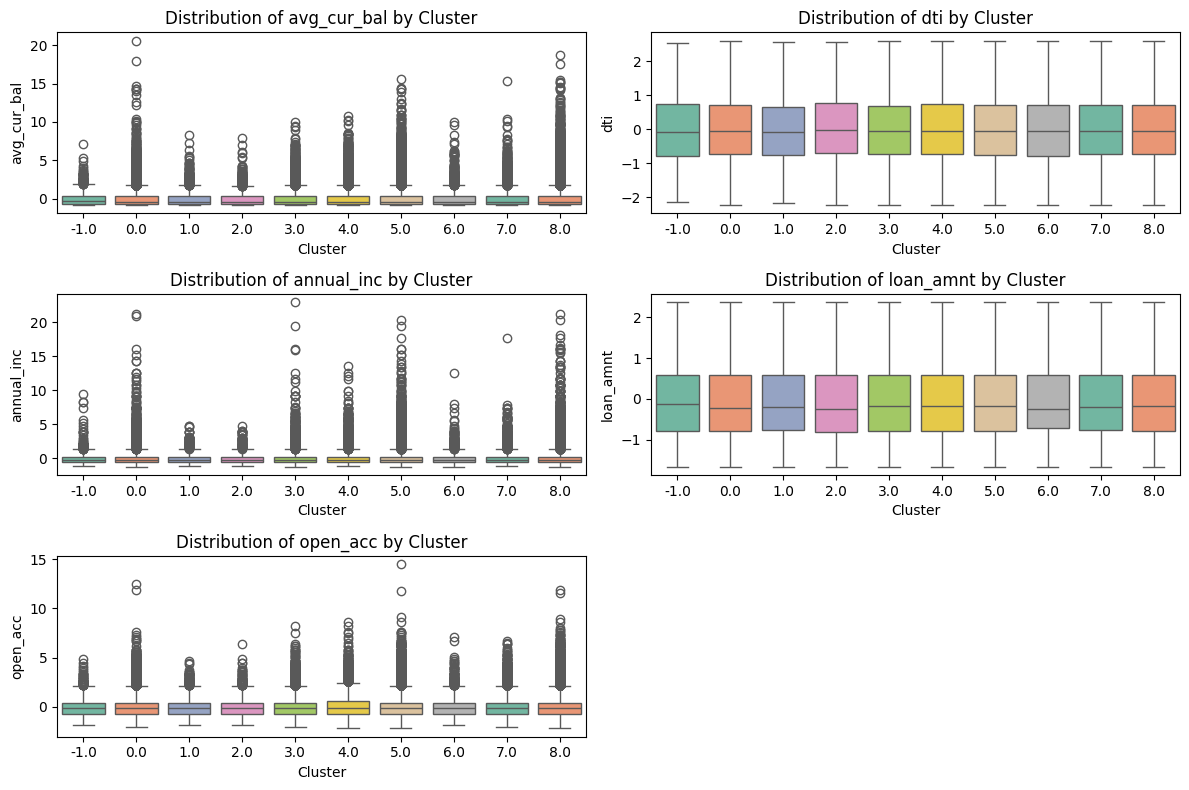

In [66]:
#Select the top 5 features
top_features = ['avg_cur_bal', 'dti', 'annual_inc', 'loan_amnt', 'open_acc']

#Create box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Cluster_hdbscan', y=feature, data=Hdbscan_umap_2d, palette='Set2')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [67]:
if cleaned_filtered_df_std_imputed.isnull().any().any():
    print("Warning: Dataset contains NaN values. Handle them before ANOVA.")

In [68]:
cleaned_filtered_df_std_imputed_HDBSAN_Nova = Hdbscan_umap_2d.dropna(subset =['Cluster_hdbscan'])

In [69]:
from scipy.stats import f_oneway

#Perform ANOVA for each selected column
anova_results = {}
for col in top_features:
    groups = [cleaned_filtered_df_std_imputed_HDBSAN_Nova[cleaned_filtered_df_std_imputed_HDBSAN_Nova['Cluster_hdbscan'] == cluster][col] for cluster in cleaned_filtered_df_std_imputed_HDBSAN_Nova['Cluster_hdbscan'].unique()]
    anova_results[col] = f_oneway(*groups)

#Display p-values for each feature
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")

avg_cur_bal: F-statistic = 0.57, p-value = 0.8228
dti: F-statistic = 1.37, p-value = 0.1973
annual_inc: F-statistic = 1.07, p-value = 0.3814
loan_amnt: F-statistic = 0.47, p-value = 0.8960
open_acc: F-statistic = 1.15, p-value = 0.3205


#### Local Conclusion
---

##### avg_cur_bal (F-statistic = 0.57, p-value = 0.8228):

The p-value of 0.8228 indicates a uniform distribution of average current balance across the HDBSCAN clusters. This feature does not show significant variation between clusters and is unlikely to contribute to cluster differentiation.

##### dti (F-statistic = 1.37, p-value = 0.1973):

The p-value of 0.1973 suggests some variability in the debt-to-income ratio across clusters, but it is not statistically significant. The role of this feature in defining clusters appears limited.

##### annual_inc (F-statistic = 1.07, p-value = 0.3814):

With a p-value of 0.3814, annual income also shows no significant variation among clusters. Its contribution to cluster formation is minimal.

##### loan_amnt (F-statistic = 0.47, p-value = 0.8960):

The very high p-value (0.8960) indicates that loan amount is evenly distributed across clusters, showing no evidence of variation. This feature has negligible impact on the clustering process.

##### open_acc (F-statistic = 1.15, p-value = 0.3205):

The p-value of 0.3205 implies mild variability in the number of open accounts among clusters, but it is not statistically significant. This feature does not strongly influence the HDBSCAN clusters.

### Global Conclusion
---

Based on the results of the ANOVA analyses and the comparison between unsupervised cluster groupings and the labeled grade categories, the following conclusions can be drawn:s:

##### No Significant Variance in Key Features Across Clusters:

ANOVA results for the top five important features consistently show high p-values (
𝑝
>
0.05
p>0.05), indicating that the selected features exhibit no significant differences across clusters. This suggests that the unsupervised clustering techniques used (e.g., HDBSCAN, UMAP, PCA) did not group data points in a way that highlights variability in these specific features.

##### Lack of Correlation Between Clusters and Labeled Grades:

The unsupervised cluster groupings show no discernible alignment with the pre-labeled credit grades. This indicates that the clustering algorithms are identifying patterns based on latent structures in the data rather than features directly tied to the labeled grading system.

##### Potential Reasons for the Observed Discrepancy:

Complex Feature Relationships: Lending Club data may have complex, nonlinear relationships between features and grades that are not well-captured by the selected clustering algorithms or the dimensionality reduction techniques.
Feature Redundancy or Noise: Some features may be redundant, noisy, or insufficiently informative for clustering to align meaningfully with the labeled grades. This could dilute the effectiveness of clustering to reflect labeled groupings.


Different Objectives: Labeled grades are typically derived from specific business logic, risk assessments, or financial criteria, whereas unsupervised clustering groups data points purely based on mathematical or statistical patterns in the features. These differing objectives likely contribute to the lack of alignment.

Feature Importance Distribution: The features selected for analysis may not be the most critical for defining either clusters or grades. Exploring additional or composite features might yield different results.

##### Implications of Unsupervised Learning:

The lack of correlation between clusters and labeled grades highlights the limitations of unsupervised learning in this context for mimicking or reproducing supervised labels. However, this does not diminish the value of unsupervised learning; it may instead uncover alternative groupings or patterns that are not reflected in the labeled data.